In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import dimers as dim

In [3]:
import KagomeFunctions as lattice

In [4]:
import itertools

In [5]:
from scipy.special import erfc

In [6]:
from time import time

In [7]:
import DualwormFunctions as dw
import Observables as obs

%load_ext line_profiler
%load_ext memory_profiler

import RunBasis
import argparse
import StartStates as strst
import numpy as np

import AnalysisFunctions as af # functions to make the analysis code cleaner
import KagomeDrawing as kdraw


import matplotlib.pyplot as plt
%matplotlib inline

import yep

In [11]:
nst = 2048;
nsm = 32;
nips = 4;
nrps = 4;
nb = 4;
measperiod = 1;
nt = 128
nh = 1
ncores = 4
nmaxiter = 1
L = 8
J1 = 1
J2 = 0.1
J3 = 0.2
h = 0
notfullstateupdate = True
stroutput = "LargeJ3_J11J20.1J30.2_L12_plot1"

In [12]:
# Create a folder to save the pictures
foldername = "./" + stroutput + "_folder/" 
results_foldername = 'Results/'
os.makedirs(foldername + 'Plots' + results_foldername, exist_ok = True)

filenamelist = ["backup"]
n = len(filenamelist)

In [13]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref,ids2walker] =\
af.LoadParameters(foldername, filenamelist)

In [14]:
kw = {'binning': False, 'plzplot': True, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields,
               listfunctions, **kw)

[-0.8]


In [15]:
t_h_MeanE[0][0]

array([-0.8])

In [16]:
# Load the states
t_spinstates, t_states, t_charges = af.LoadStates(stroutput+"_folder/", ["backup"], L, nh)
latsize = t_spinstates[0][62].size
[d_ijl, ijl_d, s_ijl, ijl_s, d_2s, s2_d, d_nd, d_vd, d_wn,
     sidlist, didlist, c_ijl, ijl_c, c2s, csign] =\
    dw.latticeinit(L[0])
print(ids2walker[0][0,0])

0


In [17]:
#### State analysis
L = L[0]
state = t_states[0][ids2walker[0][0,0]]
spinstate = t_spinstates[0][ids2walker[0][0,0]]
chargestate = t_charges[0][ids2walker[0][0,0]]

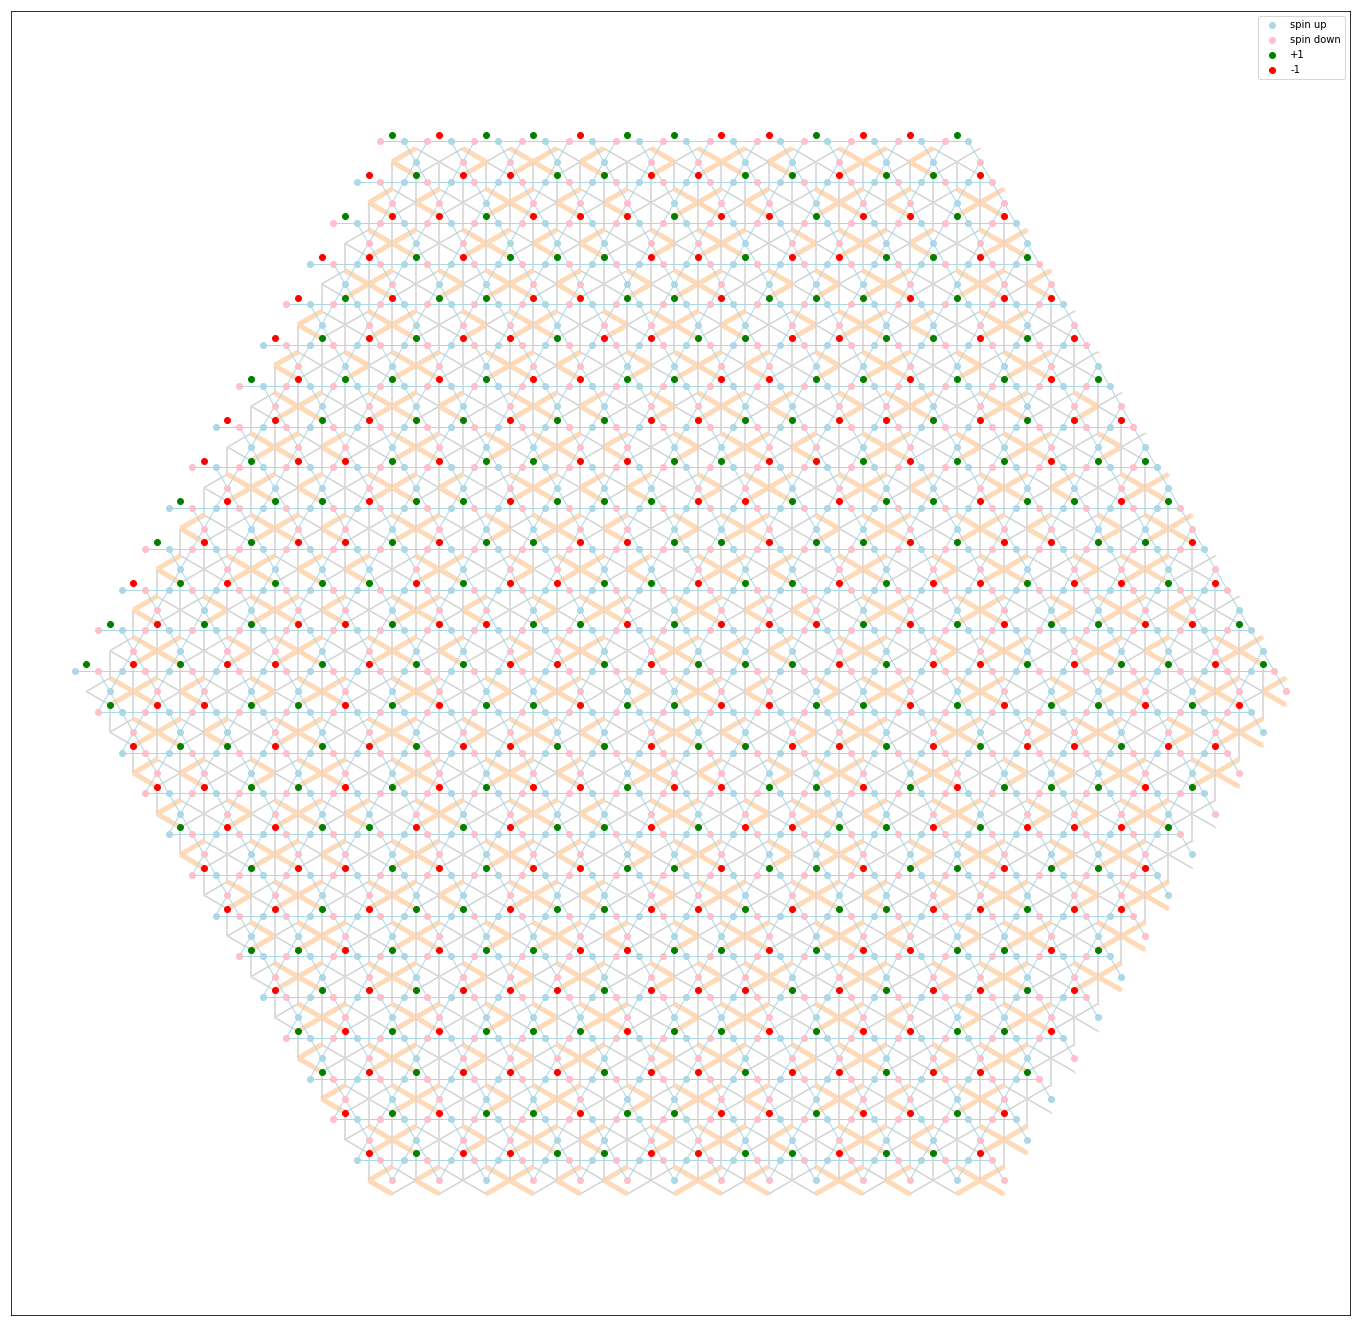

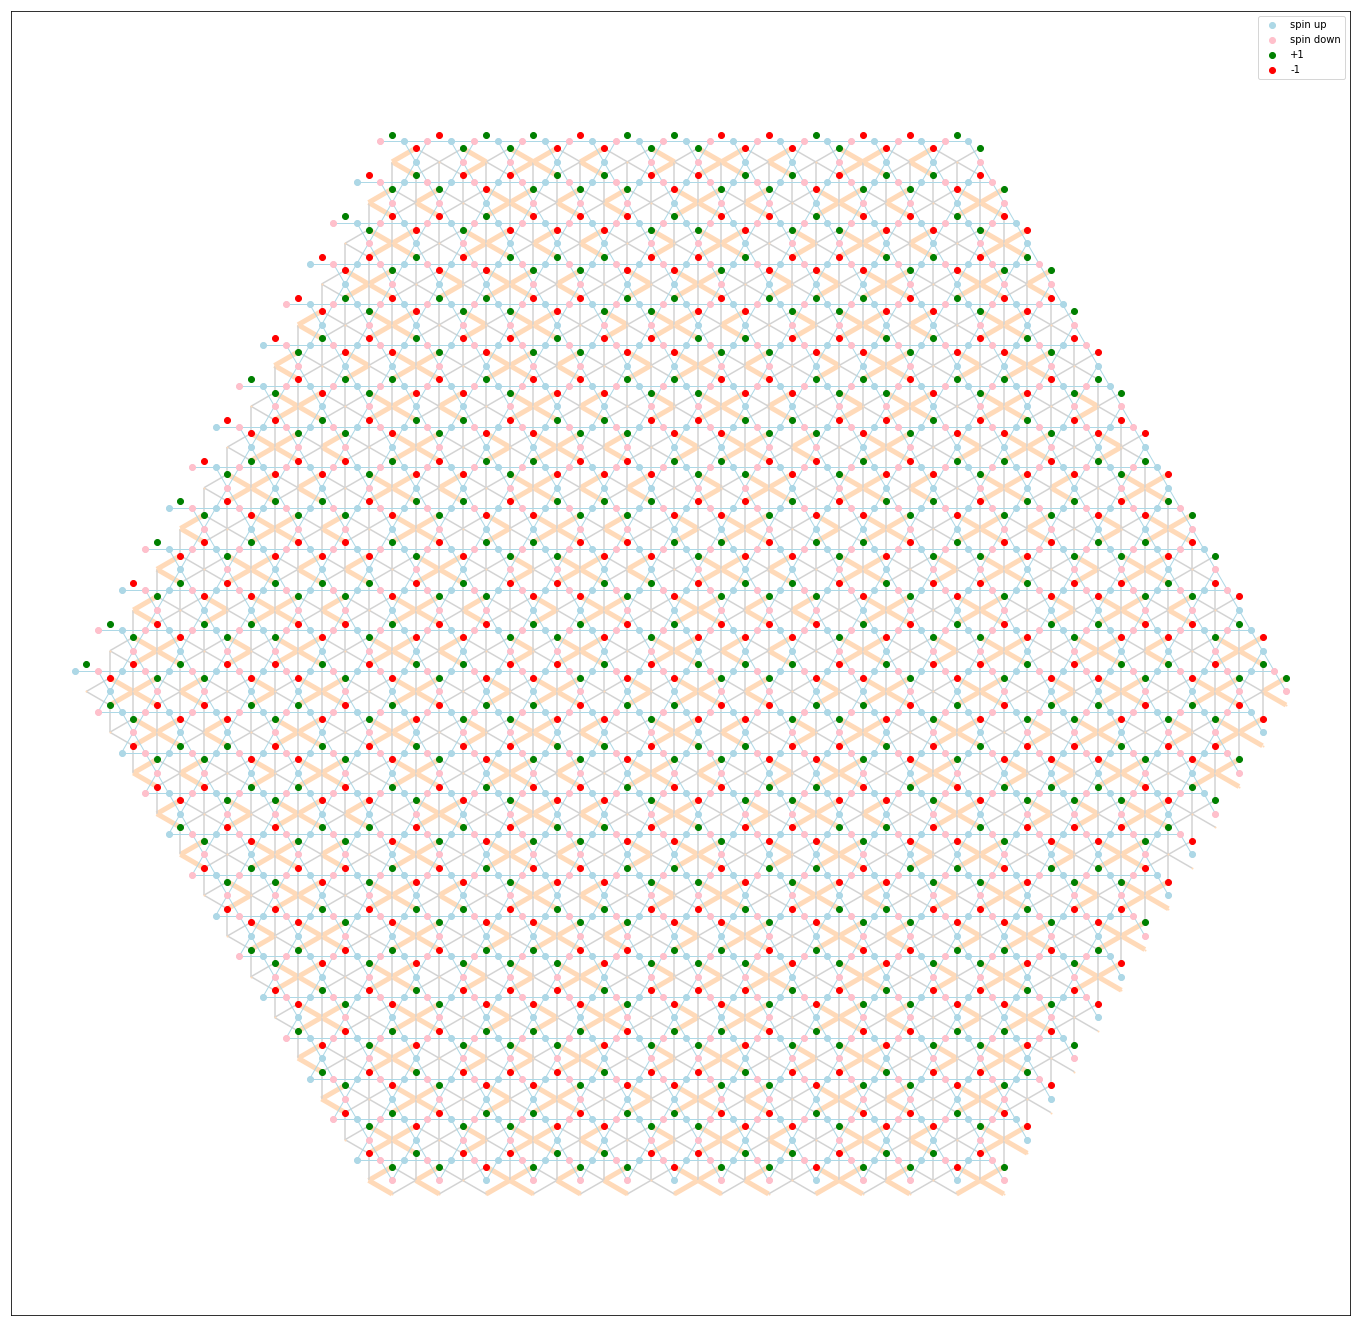

In [19]:
kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', 
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(chargestate, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=False)
plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/FullCharges_GSConfig1.png")

In [ ]:
### Try to turn a "triangle"
kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', 
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(chargestate, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=True)


dlist = [ijl_d[(L+2,4,1)],ijl_d[(L+2,4,3)],
         ijl_d[(L+3,3,4)],ijl_d[(L+3,3,3)],
         ijl_d[(L+2,3,1)],ijl_d[(L+2,3,2)],
         ijl_d[(L+3,2,2)],ijl_d[(L+3,2,3)],
         ijl_d[(L+4,2,3)],ijl_d[(L+4,2,4)],
         ijl_d[(L+4,3,3)],ijl_d[(L+4,3,5)],
         ijl_d[(L+4,4,5)],ijl_d[(L+4,4,4)],
         ijl_d[(L+3,4,2)],ijl_d[(L+3,4,3)],
         ijl_d[(L+3,5,5)],ijl_d[(L+3,5,4)],
         ijl_d[(L+2,5,2)],ijl_d[(L+2,5,4)],
         ijl_d[(L+1,5,2)],ijl_d[(L+1,5,1)]
        ]
kdraw.plot_dice_dimers(dlist, d_ijl, L, 2, color = "blue", alpha = 0.2, linewidth=5)
dlist2 = [ijl_d[(L-1,11,2)],ijl_d[(L-1,11,1)],
          ijl_d[(L,10,3)],ijl_d[(L,10,4)],
          ijl_d[(L-1,10,2)],ijl_d[(L-1,10,1)],
          ijl_d[(L,9,3)],ijl_d[(L,9,4)],
          ijl_d[(L-1,9,2)],ijl_d[(L-1,9,1)],
          ijl_d[(L,8,3)],ijl_d[(L,8,2)],
          ijl_d[(L+1,8,4)],ijl_d[(L+1,8,3)],
          ijl_d[(L+1,9,5)],ijl_d[(L+1,9,3)],
          ijl_d[(L+1,10,5)],ijl_d[(L+1,10,3)],
          ijl_d[(L+1,11,5)],ijl_d[(L+1,11,4)],
          ijl_d[(L,11,2)],ijl_d[(L,11,4)]
        ]
kdraw.plot_dice_dimers(dlist2, d_ijl, L, 2, color = "green", alpha = 0.4, linewidth=5)

plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/GSConfig1_SpinsUpdate.png")

In [ ]:
couplings = {'J1':J1[0], 'J2':J2[0],'J3':J3[0], 'J3st':J3[0]}
hamiltonian = dw.Hamiltonian(couplings, d_ijl, ijl_d, L)
print("Original energy per site:" ,dw.compute_energy(hamiltonian, state, len(s_ijl)))
newstate = np.copy(state)
for d in dlist:
    newstate[d] = -newstate[d]
print("New energy per site:" ,dw.compute_energy(hamiltonian, newstate, len(s_ijl)))
newspinstates = dw.states_dimers2spins(sidlist, didlist, np.array([newstate]),
                       np.array([np.copy(spinstate)]),1, 4, randspinupdate = False)
newspinstate = newspinstates[0]
newcharges = obs.charges(0, newstate, 0 , newspinstate, s_ijl, ijl_s,c2s = c2s , csign= csign)

In [ ]:
# Plot the new state(s)
kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [newstate], [newspinstate],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', 
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(newcharges, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=True)
plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/GSConfig1_Update1.png")

kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [newstate], [newspinstate],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', no_dim_color = 'red',
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(newcharges, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=False)
plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/FullCharges_GSConfig1_Update1.png")

In [ ]:
couplings = {'J1':J1[0], 'J2':J2[0],'J3':J3[0], 'J3st':J3[0]}
hamiltonian = dw.Hamiltonian(couplings, d_ijl, ijl_d, L)
print("Original energy per site:" ,dw.compute_energy(hamiltonian, state, len(s_ijl)))
newstate2 = np.copy(state)
for d in dlist2:
    newstate2[d] = -newstate2[d]
print("New energy per site:" ,dw.compute_energy(hamiltonian, newstate2, len(s_ijl)))
newspinstates = dw.states_dimers2spins(sidlist, didlist, np.array([newstate2]),
                       np.array([np.copy(spinstate)]),1, 4, randspinupdate = False)
newspinstate2 = newspinstates[0]
newcharges2 = obs.charges(0, newstate2, 0 , newspinstate2, s_ijl, ijl_s,c2s = c2s , csign= csign)

In [ ]:
# Plot the new state(s)
kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [newstate2], [newspinstate2],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', 
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(newcharges2, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=True)
plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/GSConfig1_Update2.png")

kdraw.plotstate(0, L, d_ijl, ijl_s, sidlist, didlist, s2_d, [newstate2], [newspinstate2],
                dim_node_color = 'peachpuff', dim_color ='peachpuff', 
                spin_up_color = 'lightblue', spin_down_color = 'pink')
kdraw.plot_honeycomb_chargestate(newcharges2, ijl_c,
                                 L,2,c1_color = 'black', c2_color = 'green',
                                 c3_color = 'red', c4_color = 'black', uponly=False)
plt.legend()
plt.savefig(stroutput+"_folder/PlotsResults/FullCharges_GSConfig1_Update2.png")